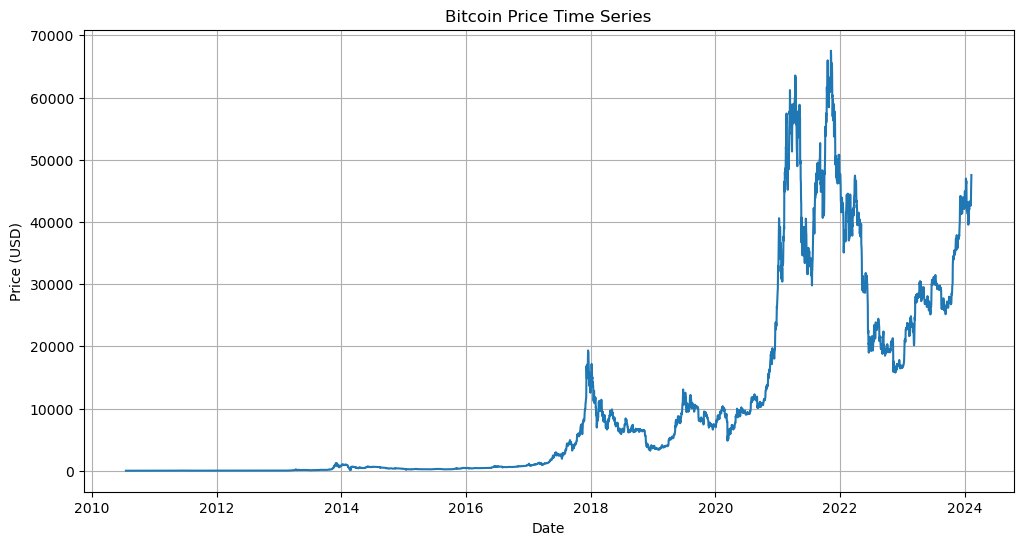

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Plot the 'Price' column
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title('Bitcoin Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()



In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the cleaned dataset
data = pd.read_csv('cleaned_data.csv')

# List of columns to check for stationarity
columns_to_check = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

for column in columns_to_check:
    # Perform the Augmented Dickey-Fuller test
    result = adfuller(data[column])
    
    # Extract and print test results
    print(f'Column: {column}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is the time series stationary?', result[1] < 0.05)
    print()


Column: Price
ADF Statistic: -0.8947799966921298
p-value: 0.7896865786639283
Critical Values: {'1%': -3.4316792794963624, '5%': -2.862127395748108, '10%': -2.5670826718210007}
Is the time series stationary? False

Column: Open
ADF Statistic: -1.02862866134411
p-value: 0.7426799948639705
Critical Values: {'1%': -3.4316792794963624, '5%': -2.862127395748108, '10%': -2.5670826718210007}
Is the time series stationary? False

Column: High
ADF Statistic: -0.9492280195270575
p-value: 0.7713291869986012
Critical Values: {'1%': -3.4316779298180458, '5%': -2.8621267994714574, '10%': -2.5670823543989867}
Is the time series stationary? False

Column: Low
ADF Statistic: -1.03553653058921
p-value: 0.7400835817233644
Critical Values: {'1%': -3.4316790093412584, '5%': -2.8621272763958525, '10%': -2.567082608284997}
Is the time series stationary? False

Column: Vol.
ADF Statistic: -7.779289258607883
p-value: 8.502208329525007e-12
Critical Values: {'1%': -3.4316792794963624, '5%': -2.862127395748108, '1

In [2]:
#Printing the dataset info

# Load the cleaned dataset
data = pd.read_csv('cleaned_data.csv')

# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4955 non-null   object 
 1   Price     4955 non-null   float64
 2   Open      4955 non-null   float64
 3   High      4955 non-null   float64
 4   Low       4955 non-null   float64
 5   Vol.      4955 non-null   float64
 6   Change %  4955 non-null   float64
dtypes: float64(6), object(1)
memory usage: 271.1+ KB
None


In [3]:
# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get statistical summary for 'Open', 'High', 'Low', 'Vol.', and 'Change %' columns
summary = data[['Open', 'High', 'Low', 'Vol.', 'Change %']].describe()

# Get the minimum price of Bitcoin
min_price = data['Price'].min()

# Print the statistical summary for 'Open', 'High', 'Low', 'Vol.', and 'Change %' columns
print("Statistical Summary for 'Open', 'High', 'Low', 'Vol.', and 'Change %' Columns:")
print(summary)

# Print the minimum price of Bitcoin, 1st quartile, median, mean, 3rd quartile, and maximum
print("\nMinimum Price of Bitcoin:", min_price)
print("1st Quartile:", data['Price'].quantile(0.25))
print("Median:", data['Price'].median())
print("Mean:", data['Price'].mean())
print("3rd Quartile:", data['Price'].quantile(0.75))
print("Maximum:", data['Price'].max())

# Get length, class, and mode for 'Date' column
date_length = len(data['Date'])
date_class = data['Date'].dtype
date_mode = data['Date'].mode()[0]

# Print length, class, and mode for 'Date' column
print("\nDate:")
print("Length:", date_length)
print("Class:", date_class)
print("Mode:", date_mode)


Statistical Summary for 'Open', 'High', 'Low', 'Vol.', and 'Change %' Columns:
               Open          High           Low          Vol.     Change %
count   4955.000000   4955.000000   4955.000000  4.955000e+03  4955.000000
mean   10362.236387  10618.261251  10085.406700  1.248619e+07     0.004119
std    15229.364616  15605.287664  14816.044711  1.555710e+08     0.071176
min        0.000000      0.100000      0.000000  8.000000e+01    -0.572000
25%      224.850000    230.500000    220.350000  3.171000e+04    -0.012000
50%     1332.900000   1356.200000   1309.700000  6.877000e+04     0.000000
75%    13361.600000  13835.800000  12834.400000  1.891100e+05     0.018000
max    67528.700000  68990.600000  66334.900000  4.470000e+09     3.368000

Minimum Price of Bitcoin: 0.1
1st Quartile: 225.15
Median: 1336.3
Mean: 10371.753864783048
3rd Quartile: 13451.05
Maximum: 67527.9

Date:
Length: 4955
Class: datetime64[ns]
Mode: 2010-07-18 00:00:00


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4955
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -39162.041
Date:                Fri, 03 May 2024   AIC                          78334.081
Time:                        02:30:35   BIC                          78366.621
Sample:                             0   HQIC                         78345.491
                               - 4955                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8212      0.007    124.256      0.000       0.808       0.834
ar.L2         -0.9487      0.006   -152.031      0.000      -0.961      -0.936
ma.L1         -0.8487      0.006   -135.531      0.0

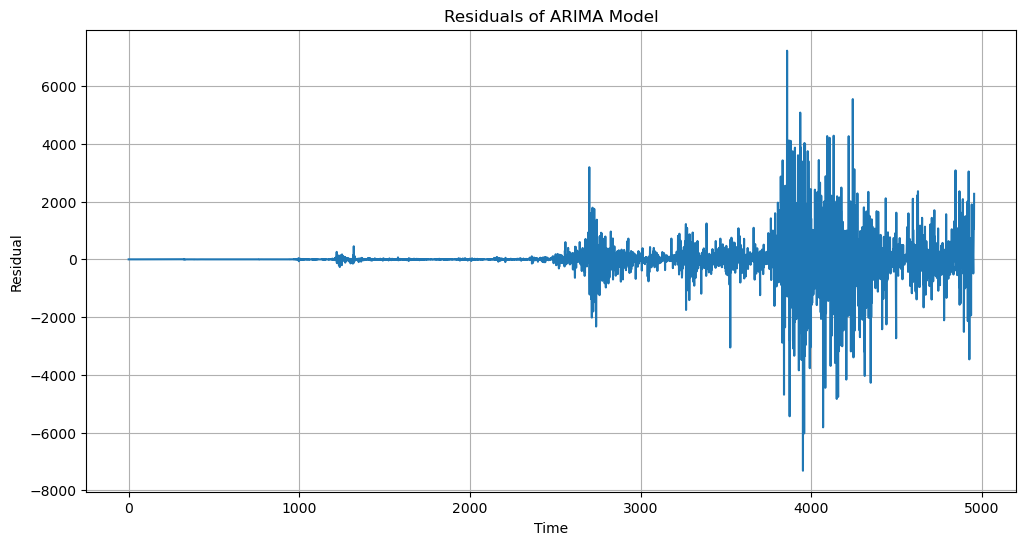

Ljung-Box Test - Statistics: lb_stat
Ljung-Box Test - p-values: lb_pvalue


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load the stationary dataset
data = pd.read_csv('cleaned_data.csv')

# Assuming 'Price' is the column containing Bitcoin prices
ts = data['Price']

# Fit an ARIMA model (Example values, you should use the best model from previous steps)
model = ARIMA(ts, order=(2, 1, 2))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.show()
# Perform the Ljung-Box test for autocorrelation of residuals
lb_test_stat, lb_p_value = acorr_ljungbox(residuals, lags=10)
print("Ljung-Box Test - Statistics:", lb_test_stat)
print("Ljung-Box Test - p-values:", lb_p_value)